In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
df = pd.read_excel("VASAseq-CDR3-IGH-clones.xlsx", index_col=0)
print("entries:", len(df))
df.head()

entries: 3305


,cdr3pep,freq,ufi,Sample,Patient
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5
2,CADIWADDSPLW,1,1,ATGAGCAG,E5
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5


In [3]:
# ASC B cells: K1-24, D19-21
asc = list()
for i in range(1,25):
    asc.append("K" + str(i))
for i in range(19,22):
    asc.append("D" + str(i))
print(asc)

['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24', 'D19', 'D20', 'D21']


In [4]:
# Get ASC clones
df_asc = df[df['Patient'].isin(asc)]
print("Entries:", len(df_asc))
df_asc.head()

Entries: 2531


,cdr3pep,freq,ufi,Sample,Patient
38,C,1,1,TAAGGTCC,D20
39,CAILKEYDFVGMDVW,1,1,TAAGGTCC,D20
40,CAIVKEYDFGGMDVW,1,1,TAAGGTCC,D20
41,CARGKEYDFGGMDVW,3,3,TAAGGTCC,D20
42,CARGKEYDYGGMDVW,1,1,TAAGGTCC,D20


In [5]:
# Remove ASC clones from original clones table
df = df[~df['cdr3pep'].isin(df_asc['cdr3pep'])]
print("Entries:", len(df))
df.head()

Entries: 445


,cdr3pep,freq,ufi,Sample,Patient
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5
2,CADIWADDSPLW,1,1,ATGAGCAG,E5
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5


In [6]:
print(sorted(df['Patient'].unique()))
print("Wells left:", df['Patient'].nunique())

['A11', 'A12', 'A13', 'A16', 'A18', 'A21', 'B13', 'B14', 'B15', 'B16', 'B18', 'B3', 'C1', 'C10', 'C11', 'C12', 'C13', 'C16', 'C17', 'C2', 'C24', 'C5', 'C8', 'D1', 'D11', 'D12', 'D14', 'D18', 'D2', 'D23', 'D24', 'D3', 'D4', 'D6', 'D7', 'E1', 'E12', 'E13', 'E14', 'E17', 'E2', 'E22', 'E23', 'E24', 'E4', 'E5', 'E6', 'E7', 'E8', 'F10', 'F12', 'F14', 'F16', 'F19', 'F2', 'F20', 'F21', 'F23', 'F24', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'G10', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G2', 'G20', 'G21', 'G24', 'G6', 'G8', 'G9', 'H1', 'H10', 'H12', 'H15', 'H16', 'H17', 'H18', 'H21', 'H22', 'H3', 'H7', 'H9', 'I10', 'I12', 'I14', 'I15', 'I16', 'I17', 'I2', 'I21', 'I23', 'I24', 'I3', 'I4', 'I5', 'I6', 'I8', 'J1', 'J10', 'J11', 'J12', 'J14', 'J15', 'J16', 'J18', 'J2', 'J21', 'J23', 'J24', 'J6', 'J7', 'J8', 'L12', 'L2', 'L7', 'L9', 'M12', 'M14', 'M15', 'M9', 'N11', 'N13', 'N3', 'N8', 'P14', 'P2']
Wells left: 137


In [7]:
# Write clones to disk
df.to_excel("VASAseq-noASC-CDR3-IGH-clones.xlsx")

## Determine distance between samples

In [8]:
df_pivot = df.pivot_table(columns=['Patient','Sample'], index='cdr3pep', values='freq')
df_pivot = df_pivot.fillna(0)
df_pivot.head()

Patient,A11,A12,A13,A16,A18,A21,B13,B14,B15,B16,...,M12,M14,M15,M9,N11,N13,N3,N8,P14,P2
Sample,TACTGGTA,ACGATAGG,GATGTCGA,CTTTGACA,GAGTCCTG,GGACCTTT,ACCTCAGC,GGTGGACT,GACAAACC,TAACTCCG,...,ACCAAGGA,AGTACGTG,AGAGGTGA,GGAGCTAA,TAGAGGGT,CACCATGT,CTCGTACT,ACATGTGC,AACCGGAA,ATCGACGA
cdr3pep,,,,,,,,,,,,,,,,,,,,,
CAAEGGGELHCYW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAARYSYGPSDYW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CACTTYSGSYGYYYYGMDVW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CADIRAYDSPLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CADIWADDSPLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sim = 1 - pairwise_distances(df_pivot.T, metric = "braycurtis")
sim = pd.DataFrame(sim, index=df_pivot.columns, columns=df_pivot.columns)
sim.head()

,Patient,A11,A12,A13,A16,A18,A21,B13,B14,B15,B16,...,M12,M14,M15,M9,N11,N13,N3,N8,P14,P2
,Sample,TACTGGTA,ACGATAGG,GATGTCGA,CTTTGACA,GAGTCCTG,GGACCTTT,ACCTCAGC,GGTGGACT,GACAAACC,TAACTCCG,...,ACCAAGGA,AGTACGTG,AGAGGTGA,GGAGCTAA,TAGAGGGT,CACCATGT,CTCGTACT,ACATGTGC,AACCGGAA,ATCGACGA
Patient,Sample,,,,,,,,,,,,,,,,,,,,,
A11,TACTGGTA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12,ACGATAGG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A13,GATGTCGA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A16,CTTTGACA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A18,GAGTCCTG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
excel_file = "VASAseq-noASC-CDR3-IGH.xlsx"
sim.to_excel(excel_file)
print("Wrote", excel_file, "to disk")

Wrote VASAseq-noASC-CDR3-IGH.xlsx to disk


## Create a heatmap

In [11]:
def drawBox(end, length):
    '''
    Description: draw a square with lines
    In: start (int), length (int)
    Out: None, 4 lines will be drawn on the canvas
    '''
    linewidth = 5
    low = end - length
    high = end
    plt.plot([low, high], [high, high], 'k-', lw=linewidth)   # N
    plt.plot([high, high], [low, high], 'k-', lw=linewidth)   # E
    plt.plot([low, high], [low, low], 'k-', lw=linewidth)     # S
    plt.plot([low, low], [low, high], 'k-', lw=linewidth)     # W

In [12]:
def drawHeatmap(overlap):
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 22}

    matplotlib.rc('font', **font)

    fig, ax = plt.subplots(figsize=(60, 60))
    fig.subplots_adjust(bottom=0.3)

    # is used for log scaling
    Z1 = overlap.values
    Z1[Z1 <= 0] = Z1[Z1 > 0].min()  # Replace any value below or equal to zero with lowest value above zero
    
    print("min value:", Z1.min())
    print("max value:", Z1.max())

    # get the patient-id
    labels_x = [x[0] for x in overlap.index]
    labels_y = [y[0] for y in overlap.columns]

    # draw heatmap
    plt.pcolor(overlap.values, cmap=plt.cm.viridis, norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()))
    #plt.pcolor(overlap.values, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.yticks(np.arange(0.5, len(overlap.index), 1), overlap.columns, rotation=0)
    plt.xticks(np.arange(0.5, len(overlap.columns), 1), overlap.index, rotation=90)

    # Add lines around same patient-id
    prev_label = None
    length = 0
    for i in range(len(labels_x)):
        if prev_label is not None and prev_label != labels_x[i]:
            drawBox(i, length)
            length = 0
        prev_label = labels_x[i]
        length +=1
    i += 1
    drawBox(i, length)

    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

min value: 0.013071895424836555
max value: 1.0
Wrote VASAseq-noASC-CDR3-IGH.pdf to disk


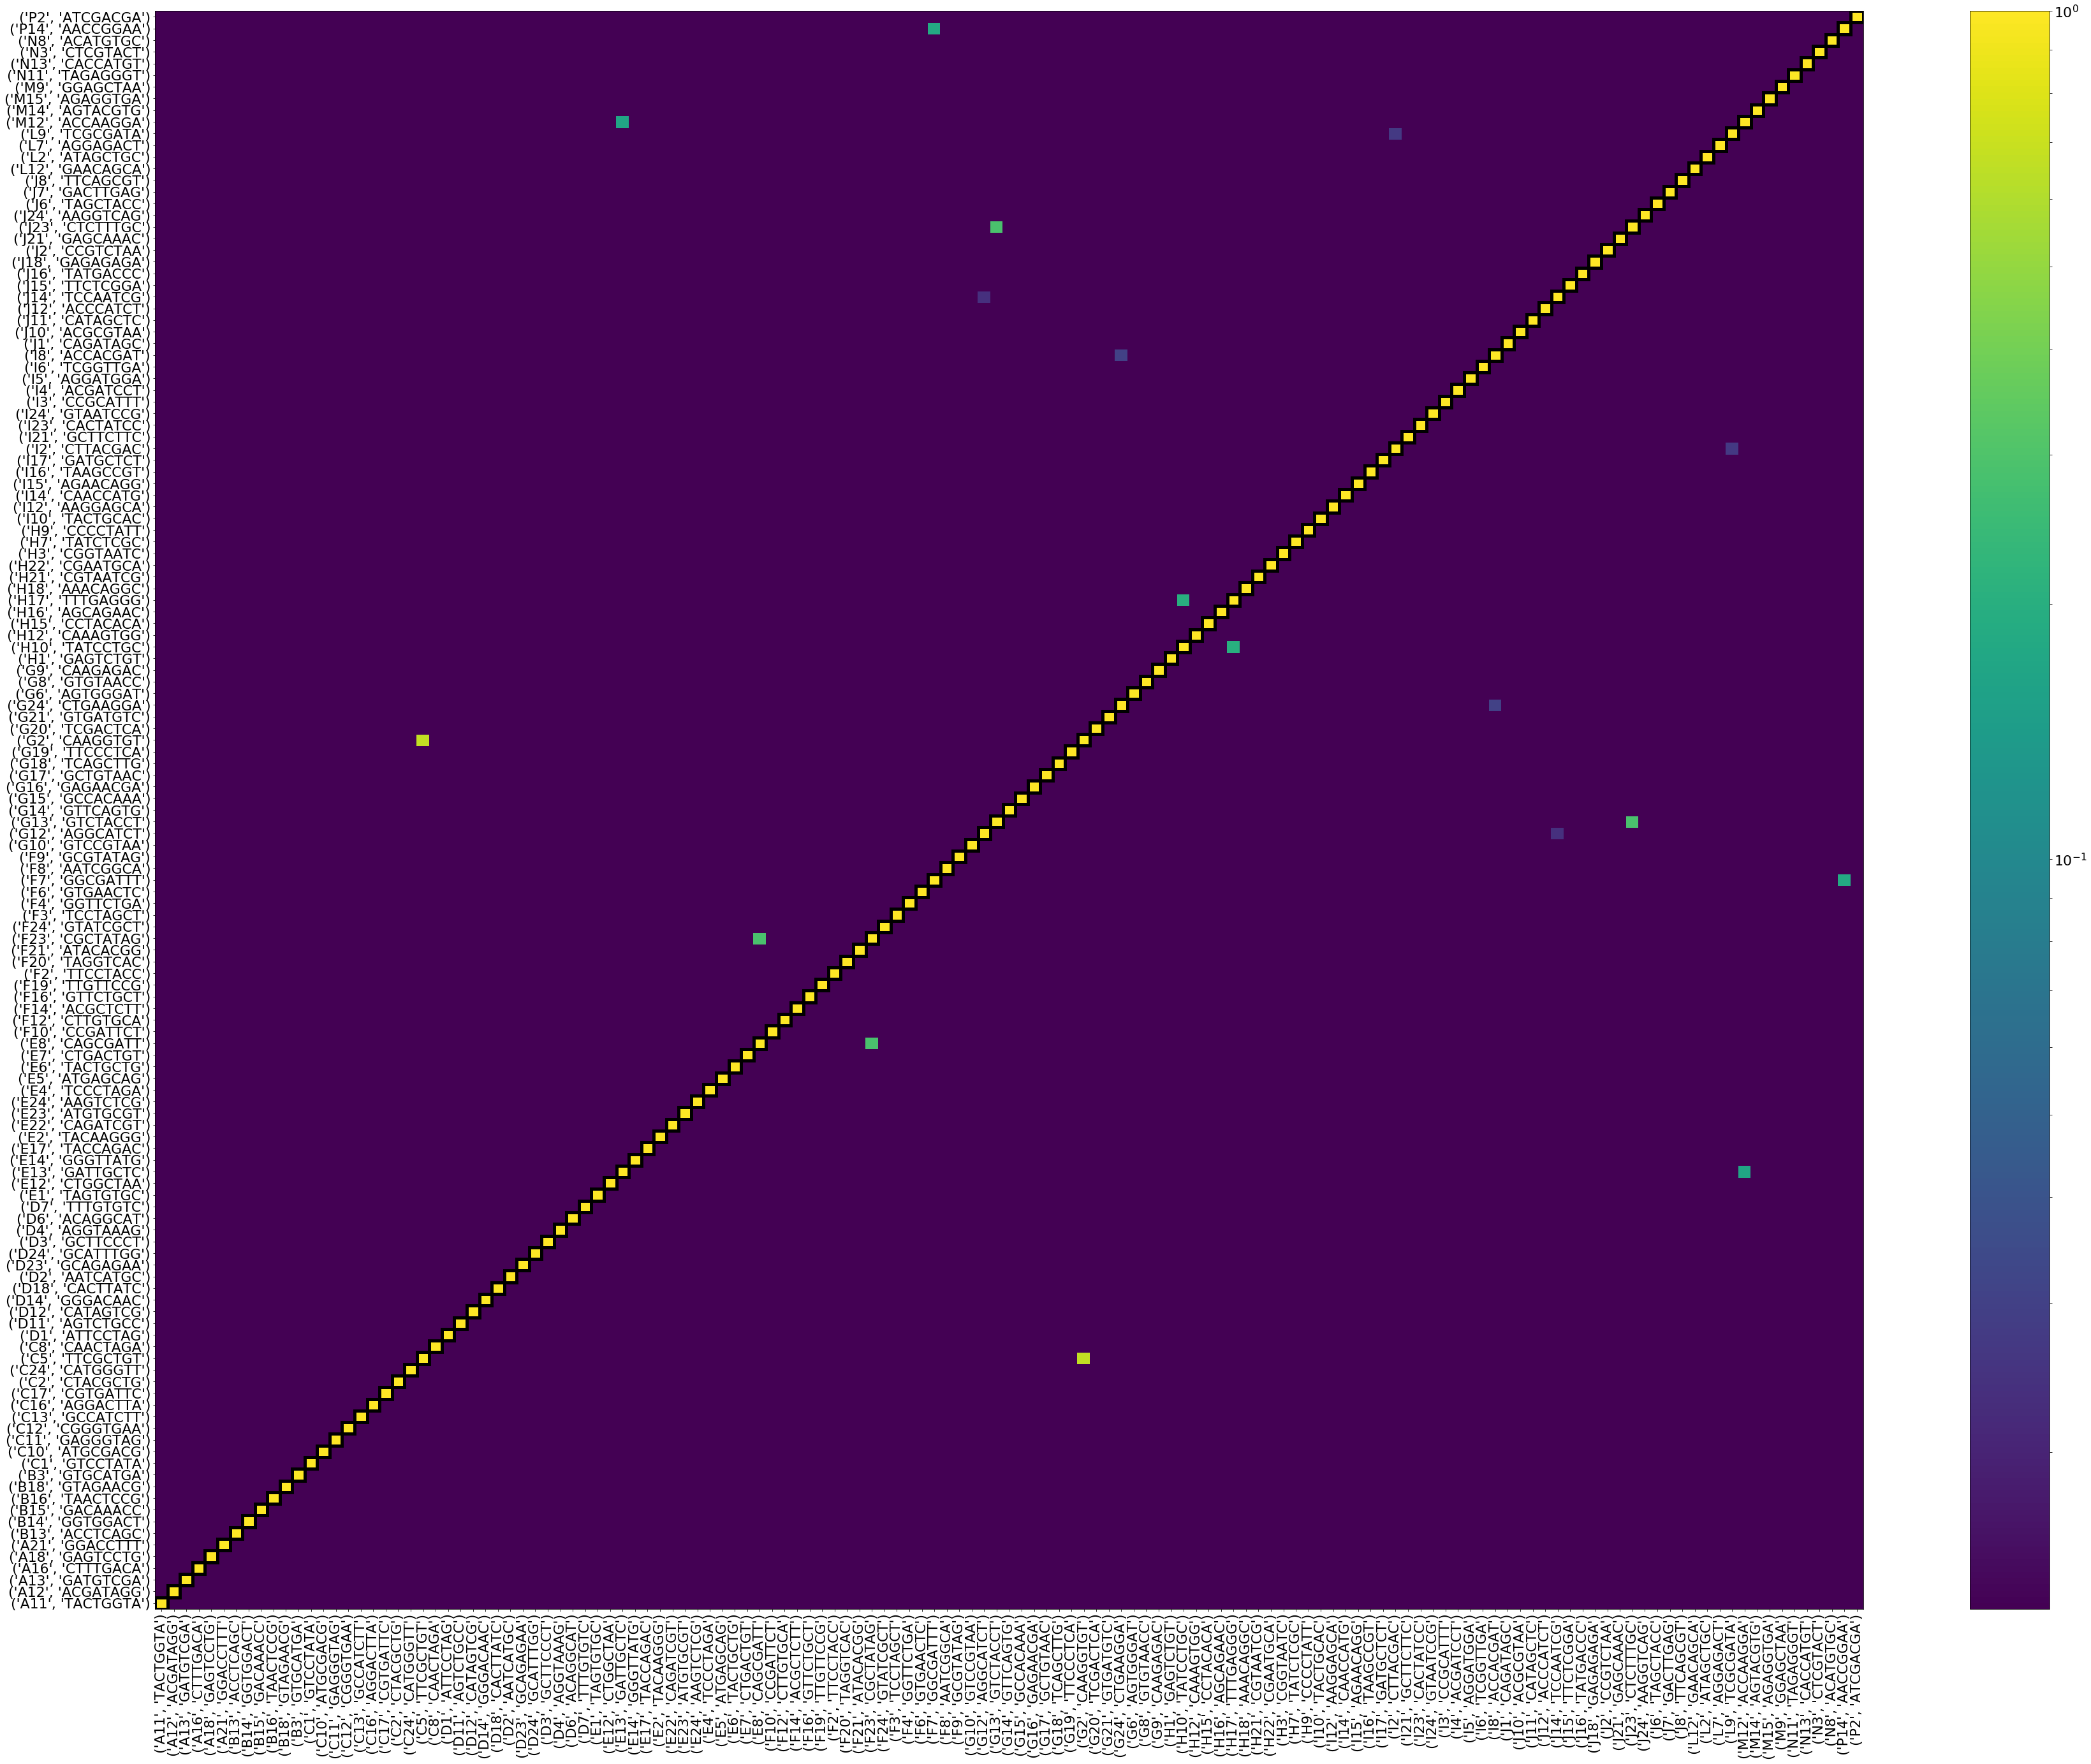

In [13]:
plotfile = "VASAseq-noASC-CDR3-IGH.pdf"
drawHeatmap(sim)

## Highlight anomalies

In [14]:
# get index pairs of same patient (divide same vs not same sample) and list indices for different patients
same_sample = list()
same_patient = list()
diff_patient = list()
for x in sim.index:
    for y in sim.columns:
        if x[0] == y[0]:  # same patient
            if x[1] == y[1]:  # same sample
                same_sample.append((x, y))
            else:        # same patient, but not same sample
                same_patient.append((x, y))
        else:             # not same patient
            diff_patient.append((x,y))    

In [15]:
# Get values of same patient (but different samples) and values for different patients
values_same_patient = [sim.loc[x][y] for x,y in same_patient]
values_diff_patient = [sim.loc[x][y] for x,y in diff_patient]
mean_diff_patient = np.mean(values_diff_patient)
std_diff_patient = np.std(values_diff_patient)
threshold = mean_diff_patient + 4 * std_diff_patient
print("mean same patient", np.mean(values_same_patient), np.std(values_same_patient))
print("mean diff patient", mean_diff_patient, std_diff_patient)
print("threshold", threshold)

mean same patient nan nan
mean diff patient 0.013259752081008316 0.008437001924594373
threshold 0.04700775977938581


/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'boxes': [<matplotlib.lines.Line2D at 0x7f5edb547438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5edb547e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5edb54ab00>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5edb54a6d8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5edb547588>,
  <matplotlib.lines.Line2D at 0x7f5edb54d828>]}

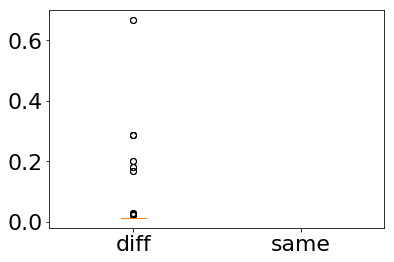

In [16]:
# Boxplot
plt.boxplot([values_diff_patient, values_same_patient], labels=['diff', 'same'])

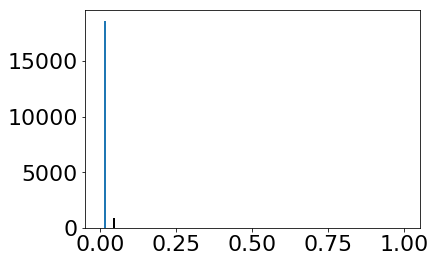

In [17]:
# Histogram
plt.hist(values_diff_patient, bins=100)
plt.hist(values_same_patient, bins=100)
plt.plot([threshold, threshold], [0, 750], 'k-', lw=2)

In [18]:
suspects_list = "VASAseq-noASC-CDR3-IGH.txt"
# Print sample names if similarity is twice the 95% interval
fhOut = open(suspects_list, "w")
check_samples = list()
for i,j in diff_patient:
    if sim.loc[i][j] > threshold:
        print(i, j, sim.loc[i][j])
        print(i, j, sim.loc[i][j], file=fhOut)
        check_samples.append((i,j))
fhOut.close()
print("Wrote", suspects_list, "to disk")

('C5', 'TTCGCTGT') ('G2', 'CAAGGTGT') 0.6666666666666667
('E13', 'GATTGCTC') ('M12', 'ACCAAGGA') 0.16666666666666663
('E8', 'CAGCGATT') ('F23', 'CGCTATAG') 0.2857142857142857
('F23', 'CGCTATAG') ('E8', 'CAGCGATT') 0.2857142857142857
('F7', 'GGCGATTT') ('P14', 'AACCGGAA') 0.18181818181818177
('G13', 'GTCTACCT') ('J23', 'CTCTTTGC') 0.2857142857142857
('G2', 'CAAGGTGT') ('C5', 'TTCGCTGT') 0.6666666666666667
('H10', 'TATCCTGC') ('H17', 'TTTGAGGG') 0.19999999999999996
('H17', 'TTTGAGGG') ('H10', 'TATCCTGC') 0.19999999999999996
('J23', 'CTCTTTGC') ('G13', 'GTCTACCT') 0.2857142857142857
('M12', 'ACCAAGGA') ('E13', 'GATTGCTC') 0.16666666666666663
('P14', 'AACCGGAA') ('F7', 'GGCGATTT') 0.18181818181818177
Wrote VASAseq-noASC-CDR3-IGH.txt to disk


In [19]:
sim2 = sim.copy()
for i, j in check_samples:
    sim2.loc[i][j] = 1

min value: 0.013071895424836555
max value: 1.0
Wrote VASAseq-noASC-CDR3-IGH-highlighted.pdf to disk


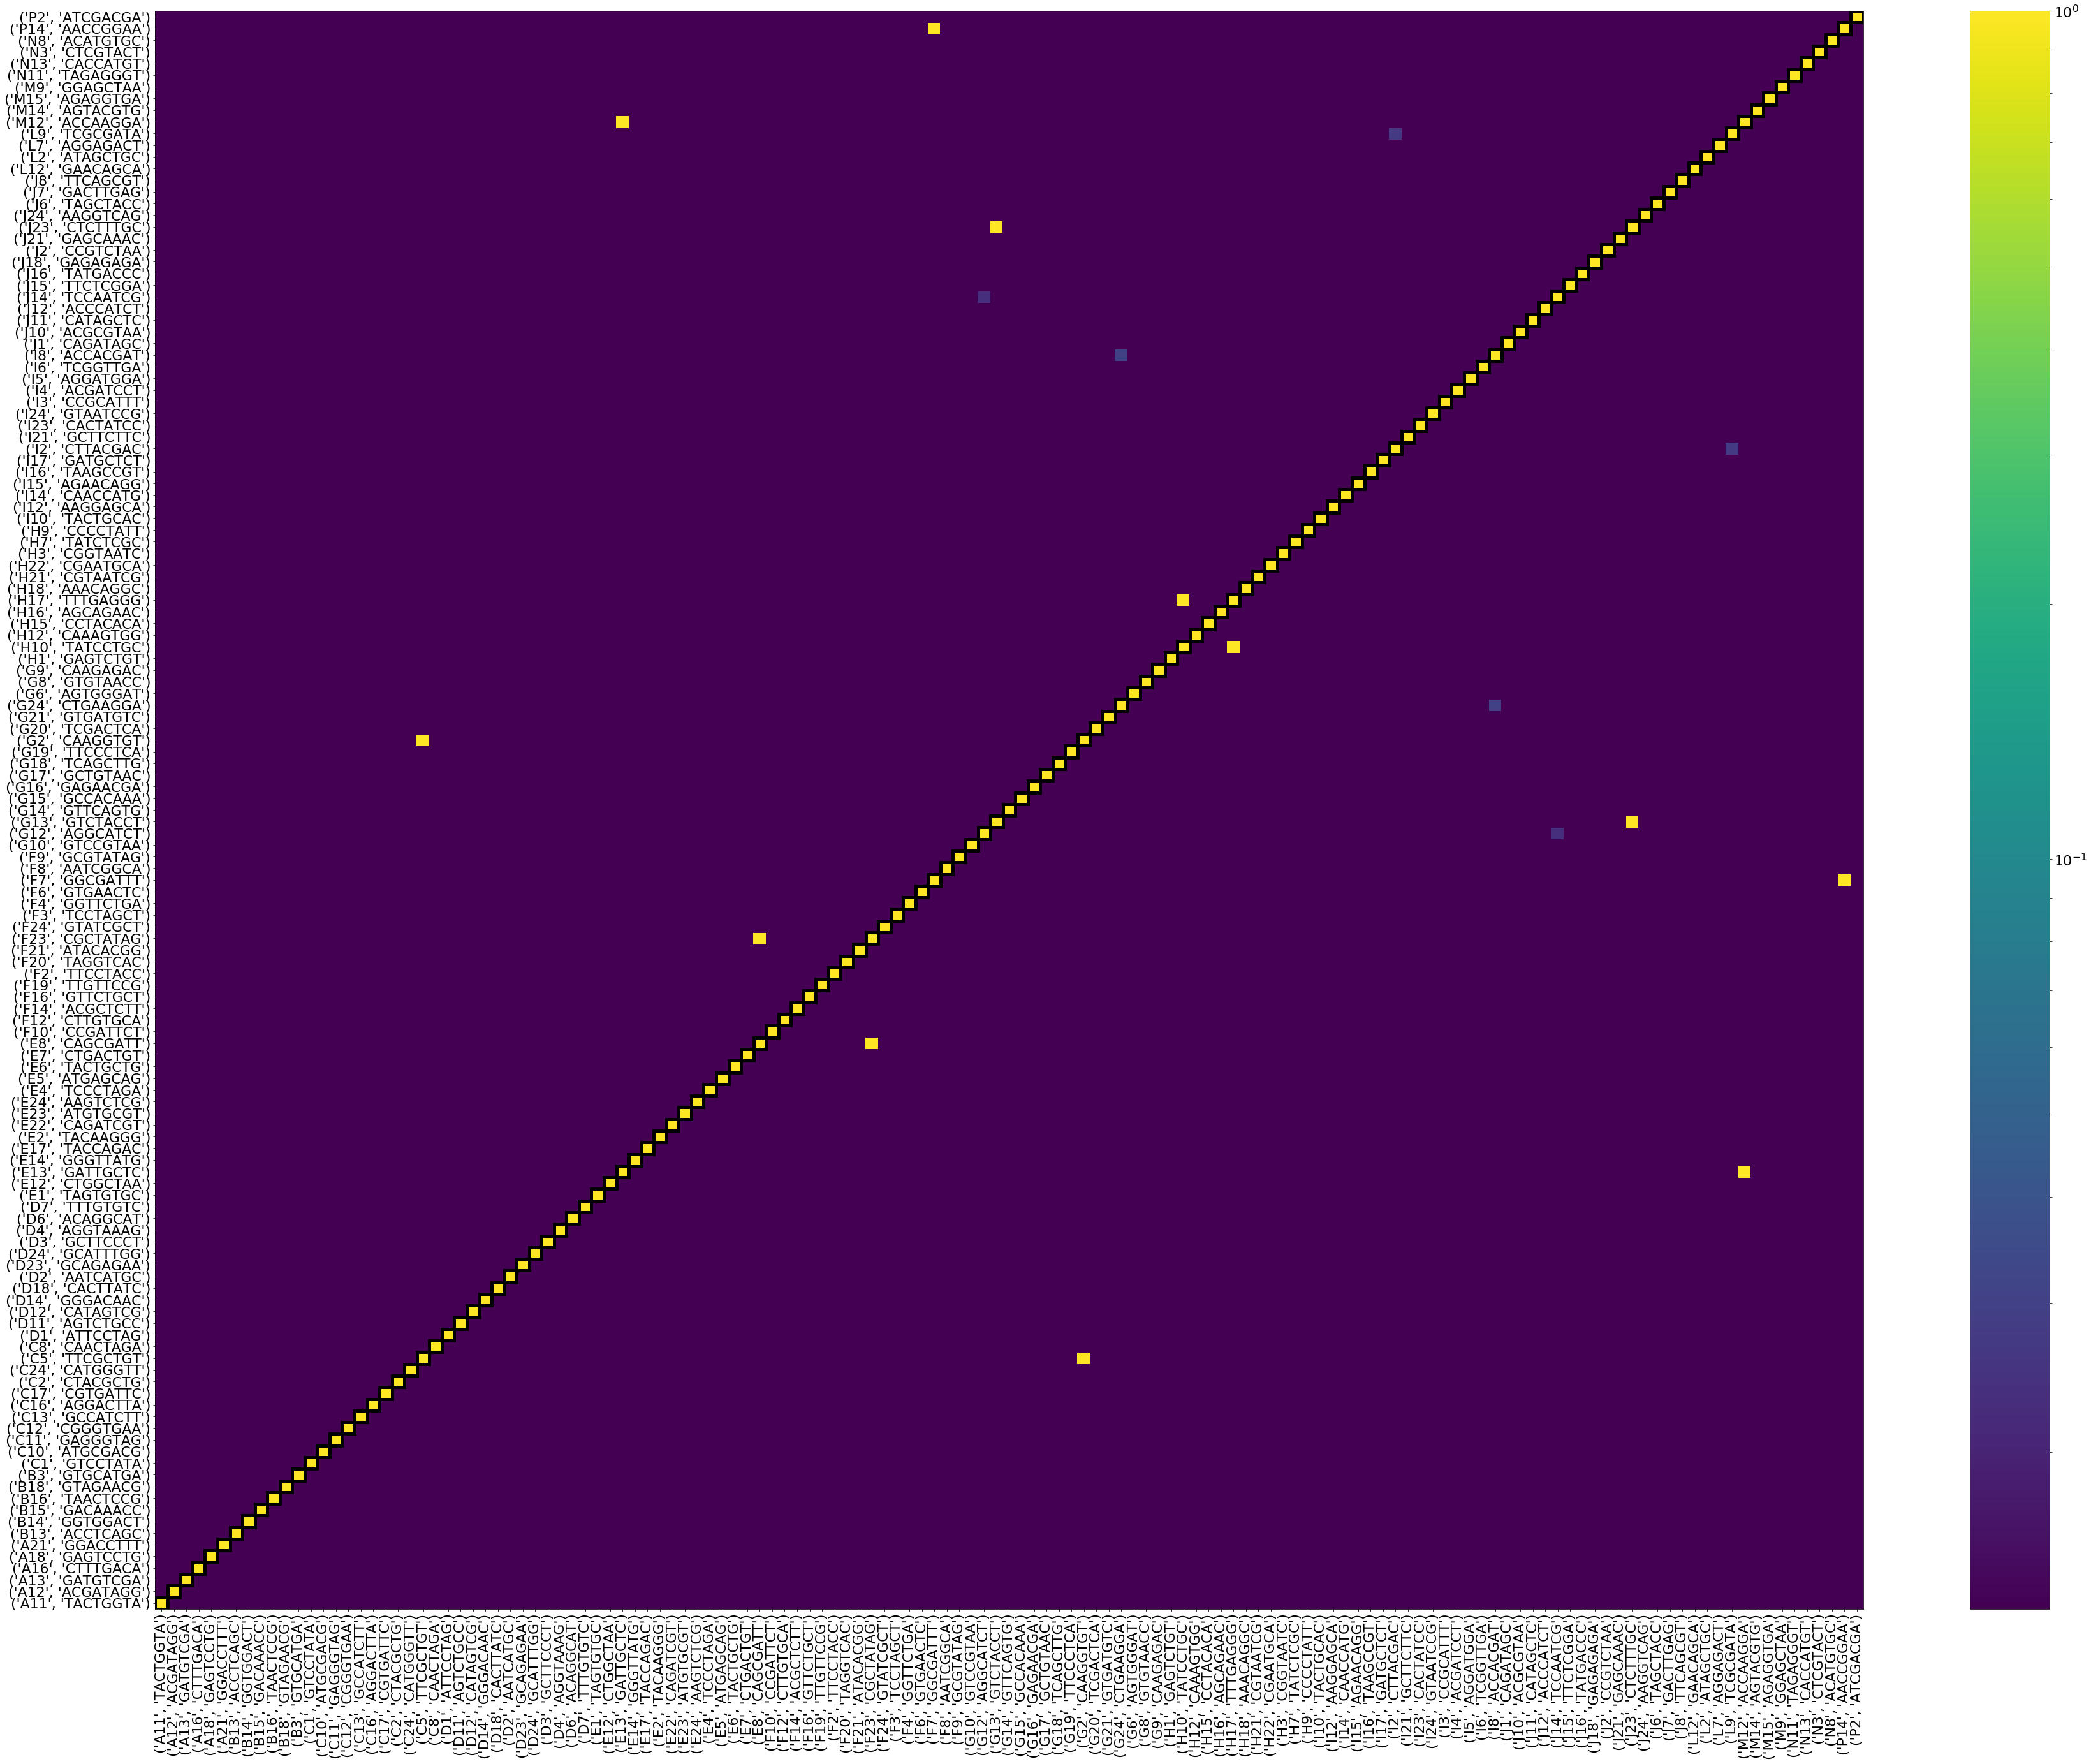

In [20]:
plotfile = plotfile.replace('.pdf', '-highlighted.pdf')
drawHeatmap(sim2)

# Shared clones direction

In [21]:
outfile = "runXX-VASAseq-noASC-IGH-HUMAN-shared-clones.xlsx"

In [22]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,AAACAGGC,7
1,AACCGGAA,1
2,AAGGAGCA,3
3,AAGGTCAG,19
4,AAGTCTCG,7


In [23]:
# Result columns should be: Patient, Sample, cdr3pep, freq, totalreads
df = pd.merge(df, df_total, on="Sample")
df.head()

,cdr3pep,freq,ufi,Sample,Patient,totalreads
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21,12
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5,53
2,CADIWADDSPLW,1,1,ATGAGCAG,E5,53
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5,53
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5,53


In [24]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,cdr3pep,freq,ufi,Sample,Patient,totalreads,perc
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21,12,100.000000
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5,53,1.886792
2,CADIWADDSPLW,1,1,ATGAGCAG,E5,53,1.886792
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5,53,1.886792
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5,53,92.452830


In [25]:
# Rename the Sample column and replace it with the Well IDs
df = df.rename(columns={'Sample': 'Barcode'})
df['Sample'] = df['Patient']
df.head()

,cdr3pep,freq,ufi,Barcode,Patient,totalreads,perc,Sample
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21,12,100.000000,I21
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5,53,1.886792,E5
2,CADIWADDSPLW,1,1,ATGAGCAG,E5,53,1.886792,E5
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5,53,1.886792,E5
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5,53,92.452830,E5


## Determine overlap (shared clones) and the direction

In [26]:
ids = list(df['Sample'].unique())
ids[:10]

['I21', 'E5', 'F9', 'J8', 'B15', 'C13', 'A21', 'J6', 'N3', 'N11']

In [27]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [28]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,I21,E5,0.0,0.0
1,I21,F9,0.0,0.0
2,I21,J8,0.0,0.0
3,I21,B15,0.0,0.0
4,I21,C13,0.0,0.0


In [29]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_shared['patient_source'] = df_shared['source']
df_shared['patient_target'] = df_shared['target']
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,I21,E5,0.0,0.0,I21,E5
1,I21,F9,0.0,0.0,I21,F9
2,I21,J8,0.0,0.0,I21,J8
3,I21,B15,0.0,0.0,I21,B15
4,I21,C13,0.0,0.0,I21,C13


In [30]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,8696,J23,G13,100.0,100.000000,J23,G13
1,5634,M12,E13,100.0,90.909091,M12,E13
2,3584,L9,I2,100.0,86.301370,L9,I2
3,7588,G2,C5,100.0,50.000000,G2,C5
4,4053,P14,F7,100.0,40.000000,P14,F7


In [31]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,8696,J23,G13,100.0,100.000000,J23,G13,different
1,5634,M12,E13,100.0,90.909091,M12,E13,different
2,3584,L9,I2,100.0,86.301370,L9,I2,different
3,7588,G2,C5,100.0,50.000000,G2,C5,different
4,4053,P14,F7,100.0,40.000000,P14,F7,different


In [32]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [33]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,8696,J23,G13,100.0,100.000000,J23,G13,different
1,1,5634,M12,E13,100.0,90.909091,M12,E13,different
2,2,3584,L9,I2,100.0,86.301370,L9,I2,different
3,3,7588,G2,C5,100.0,50.000000,G2,C5,different
4,4,4053,P14,F7,100.0,40.000000,P14,F7,different


In [34]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [35]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,8696,J23,G13,100.0,100.000000,J23,G13,different,J23->G13,blue
1,1,5634,M12,E13,100.0,90.909091,M12,E13,different,M12->E13,blue
2,2,3584,L9,I2,100.0,86.301370,L9,I2,different,L9->I2,blue
3,3,7588,G2,C5,100.0,50.000000,G2,C5,different,G2->C5,blue
4,4,4053,P14,F7,100.0,40.000000,P14,F7,different,P14->F7,blue


Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-all.pdf to disk


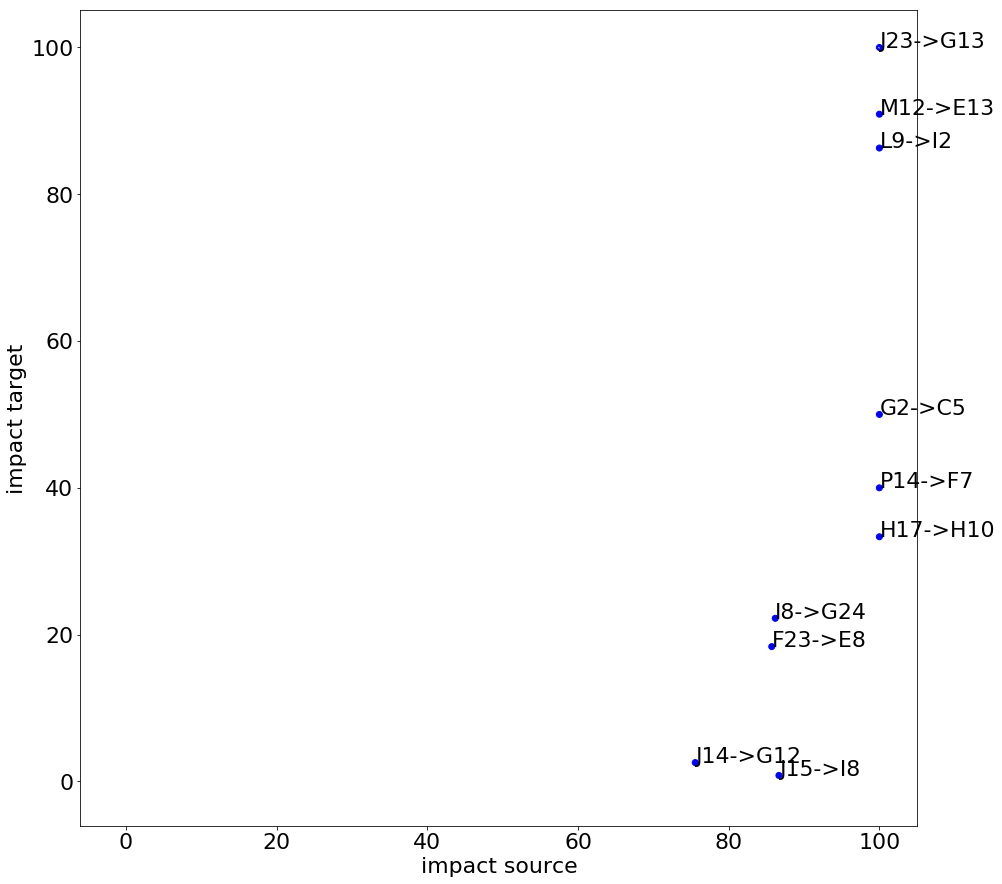

In [36]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [37]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,J23,G13,100.0,100.000000,different,J23->G13,blue
1,1,M12,E13,100.0,90.909091,different,M12->E13,blue
2,2,L9,I2,100.0,86.301370,different,L9->I2,blue
3,3,G2,C5,100.0,50.000000,different,G2->C5,blue
4,4,P14,F7,100.0,40.000000,different,P14->F7,blue


Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-different-ids.pdf to disk


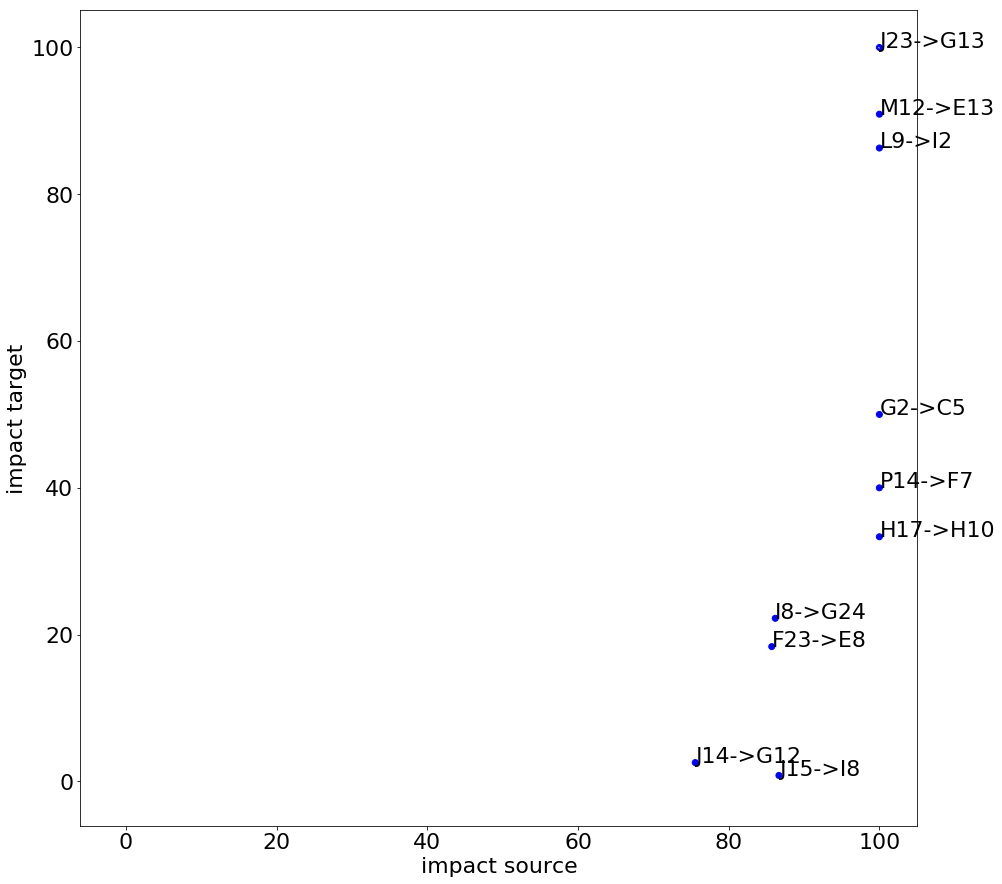

In [38]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [39]:
df.head()

,cdr3pep,freq,ufi,Barcode,Patient,totalreads,perc,Sample
0,CARDSGHSYALDVW,12,1,GCTTCTTC,I21,12,100.000000,I21
1,CADIRAYDSPLW,1,1,ATGAGCAG,E5,53,1.886792,E5
2,CADIWADDSPLW,1,1,ATGAGCAG,E5,53,1.886792,E5
3,CADIWAYDSPLR,1,1,ATGAGCAG,E5,53,1.886792,E5
4,CADIWAYDSPLW,49,2,ATGAGCAG,E5,53,92.452830,E5


In [40]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [41]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient        Sample      
                     nunique names nunique names
cdr3pep                                         
CAAEGGGELHCYW              1    E4       1    E4
CAARYSYGPSDYW              1   C11       1   C11
CACTTYSGSYGYYYYGMDVW       1   E13       1   E13
CADIRAYDSPLW               1    E5       1    E5
CADIWADDSPLW               1    E5       1    E5

In [42]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient,cdr3pep,A11,A12,A13,A16,A18,A21,B13,B14,B15,...,M12,M14,M15,M9,N11,N13,N3,N8,P14,P2
Sample,,A11,A12,A13,A16,A18,A21,B13,B14,B15,...,M12,M14,M15,M9,N11,N13,N3,N8,P14,P2
0,CAAEGGGELHCYW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAARYSYGPSDYW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CACTTYSGSYGYYYYGMDVW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CADIRAYDSPLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CADIWADDSPLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


index             cdr3pep Patient            Sample           A11 A12 A13  \
                            nunique     names nunique     names A11 A12 A13   
0    16       CAGGGGPADMDVW       2  G13, J23       2  G13, J23 NaN NaN NaN   
1   105  CARDDDSSGYYPNYFDYW       2    L9, I2       2    L9, I2 NaN NaN NaN   
2   124        CARDLVGGYDHW       2   I8, J15       2   I8, J15 NaN NaN NaN   
3   139  CARDPYGADDESYGMDVW       2   I8, G24       2   I8, G24 NaN NaN NaN   
4   200      CARGGVITKAFDYW       2    C5, G2       2    C5, G2 NaN NaN NaN   

  A16  ... M12 M14 M15  M9 N11 N13  N3  N8 P14  P2  
  A16  ... M12 M14 M15  M9 N11 N13  N3  N8 P14  P2  
0 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4 NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 143 columns]

In [44]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 435
cdr3's in > 1 sample: 10


In [45]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
